In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# correcting height to m
df['height'] = df['height']/100

In [7]:
# finding a BMI series
overweight = round(df['weight']/(df['height']**2),2)
overweight.rename('overweight',inplace=True)

0        21.97
1        34.93
2        23.51
3        28.71
4        23.01
         ...  
69995    26.93
69996    50.47
69997    31.35
69998    27.10
69999    24.91
Name: overweight, Length: 70000, dtype: float64

In [8]:
# converting BMI to a category dataset
ovwt_yn = (overweight>25).astype(int)


In [9]:
df['overweight'] = ovwt_yn

In [10]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,1.51,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,1.57,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,1.78,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,1.58,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,1.64,68.0,110,60,1,1,0,0,0,0,1


In [11]:
# normalize cholesterol and gluc column

In [12]:
normal = df[['cholesterol','gluc']] > 1
df[['cholesterol','gluc']] = normal.astype(int)

In [13]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,1.51,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,1.57,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,1.78,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,1.58,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,1.64,68.0,110,60,0,0,0,0,0,0,1


In [14]:
# another way to write the normalization 
"""
norm_ch = (df['cholesterol'] > 1).astype(int)
df['cholesterol'] = norm_ch

norm_gl = (df['gluc'] > 1).astype(int)
df['gluc'] = norm_gl"""

"\nnorm_ch = (df['cholesterol'] > 1).astype(int)\ndf['cholesterol'] = norm_ch\n\nnorm_gl = (df['gluc'] > 1).astype(int)\ndf['gluc'] = norm_gl"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int32  
 8   gluc         70000 non-null  int32  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int32  
dtypes: float64(2), int32(3), int64(9)
memory usage: 6.7 MB


In [16]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [17]:
new_data = pd.melt(df,id_vars=['cardio'],value_vars=['active','alco','cholesterol','gluc',
                                                  'overweight','smoke'])
new_data['total']=1

In [18]:
new_data = new_data.groupby(['cardio','variable','value'],as_index=False).count()
new_data

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


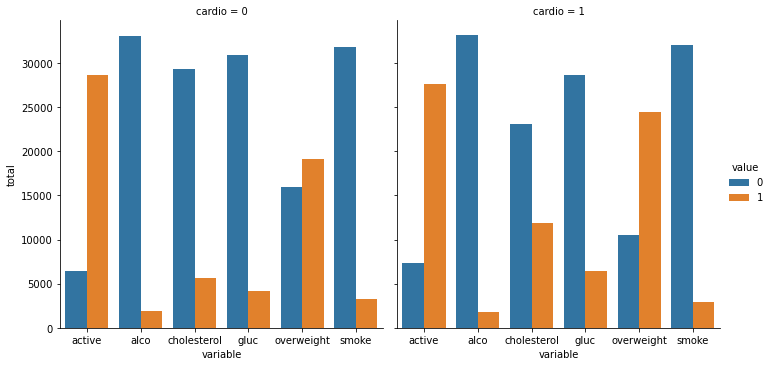

In [19]:
sns_plot_ct = sns.catplot(x='variable',y='total',data=new_data,kind='bar',col='cardio',hue='value')

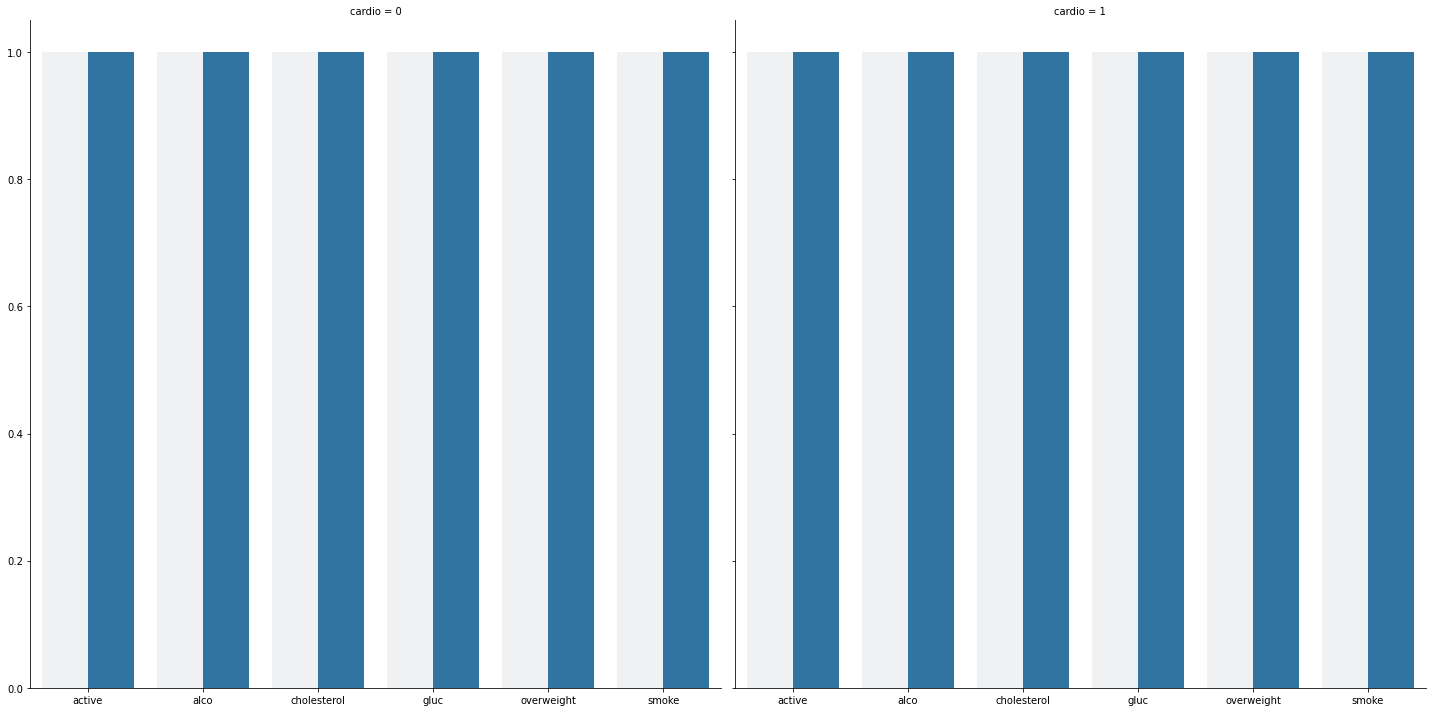

In [20]:
fig = sns.FacetGrid(new_data,col='cardio',height=10)
fig.map_dataframe(sns.countplot,x='variable',hue='value')
fig.savefig('catplot2.png')

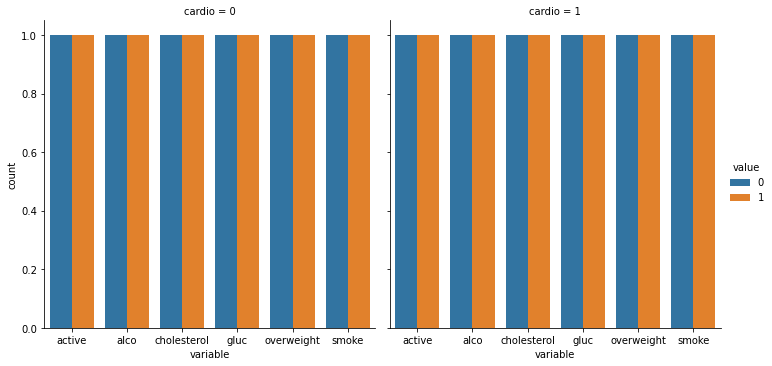

In [21]:
sns_plot_ct = sns.catplot(x='variable',data=new_data,kind='count',col='cardio',hue='value')

In [22]:
sns_plot_ct.set_axis_labels(x_var='')

In [23]:
mask_dis_pr = (df['ap_lo'] <= df['ap_hi'])
mask_h_2_5_per = (df['height'] >= df['height'].quantile(0.025))
mask_h_97_5_per = (df['height'] <= df['height'].quantile(0.975))
mask_w_2_5_per = (df['weight'] >= df['weight'].quantile(0.025))
mask_w_97_5_per = (df['weight'] <= df['weight'].quantile(0.975))

In [24]:
filt_data = df[mask_dis_pr & mask_h_2_5_per & mask_h_97_5_per & mask_w_2_5_per & mask_w_97_5_per]

In [25]:
filt_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [26]:
corr_filt_data = filt_data.corr()
corr_filt_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


<AxesSubplot:>

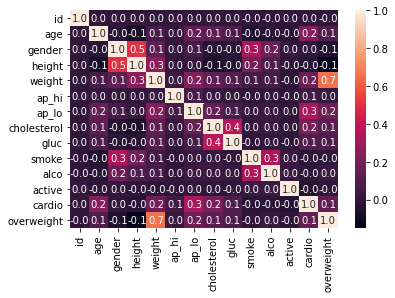

In [27]:
sns.heatmap(corr_filt_data,annot=True,fmt='.1f')

In [28]:
mask = np.triu(np.ones_like(corr_filt_data,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

In [29]:
corr_filt_data = filt_data.corr()
corr_filt_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


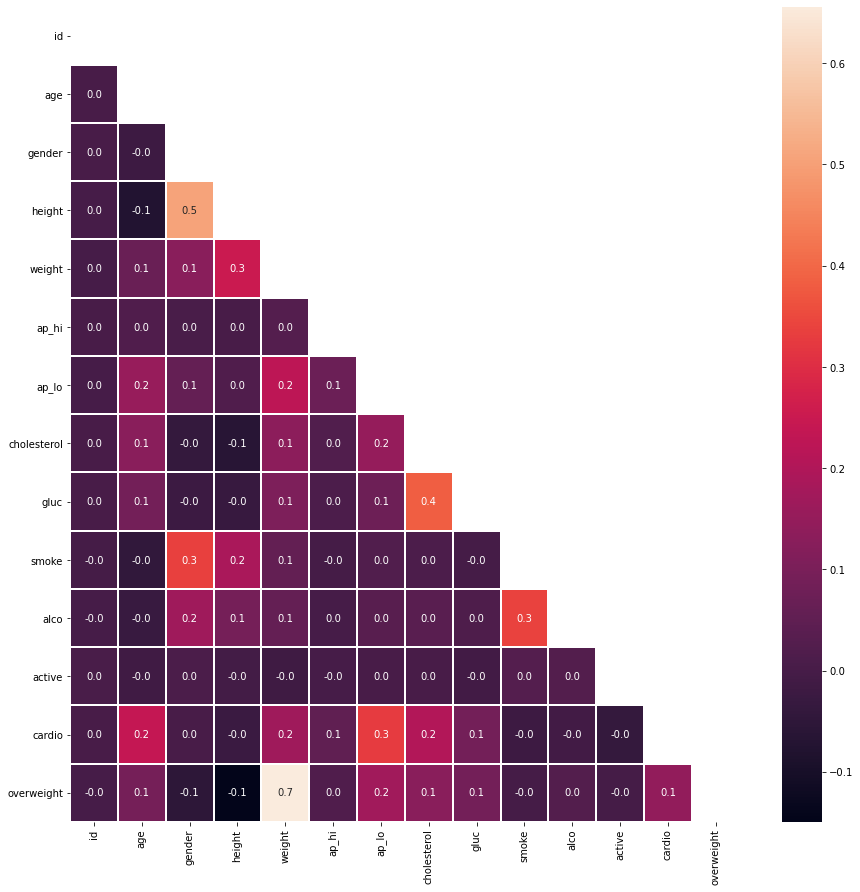

In [45]:
g = sns.heatmap(corr_filt_data,annot=True,fmt='.1f',mask=mask,linewidths=1)
g.figure.set_size_inches(15,15)

In [52]:
for label in g.get_xticklabels():
    print(label.get_text())

id
age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio
overweight


In [55]:
import matplotlib as mpl

In [58]:
actual = [text.get_text() for text in g.get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]
actual

['0.0',
 '0.0',
 '-0.0',
 '0.0',
 '-0.1',
 '0.5',
 '0.0',
 '0.1',
 '0.1',
 '0.3',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.2',
 '0.1',
 '0.0',
 '0.2',
 '0.1',
 '0.0',
 '0.1',
 '-0.0',
 '-0.1',
 '0.1',
 '0.0',
 '0.2',
 '0.0',
 '0.1',
 '-0.0',
 '-0.0',
 '0.1',
 '0.0',
 '0.1',
 '0.4',
 '-0.0',
 '-0.0',
 '0.3',
 '0.2',
 '0.1',
 '-0.0',
 '0.0',
 '0.0',
 '-0.0',
 '-0.0',
 '-0.0',
 '0.2',
 '0.1',
 '0.1',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.3',
 '0.0',
 '-0.0',
 '0.0',
 '-0.0',
 '-0.0',
 '-0.0',
 '0.0',
 '0.0',
 '-0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.2',
 '0.0',
 '-0.0',
 '0.2',
 '0.1',
 '0.3',
 '0.2',
 '0.1',
 '-0.0',
 '-0.0',
 '-0.0',
 '-0.0',
 '0.1',
 '-0.1',
 '-0.1',
 '0.7',
 '0.0',
 '0.2',
 '0.1',
 '0.1',
 '-0.0',
 '0.0',
 '-0.0',
 '0.1']

In [59]:
fig = g.figure

In [60]:
fig.savefig('test_heatplot.png')